# 分治法之整数乘法

最近在看 [*Algorithms*](https://www.amazon.com/Algorithms-Sanjoy-Dasgupta/dp/0073523402) 的分治法（Divide and Conquer）部分，发现书中举的几个例子很有意思，今天想分享的就是第一个例子：用分治法优化整数乘法。这个例子虽然简单，但是非常巧妙。

假设$x$和$y$是两个$n$-bit的整数，为了方便，假设$n$是2的幂次。于是每个数都可以等分成左右各$n/2$bit:

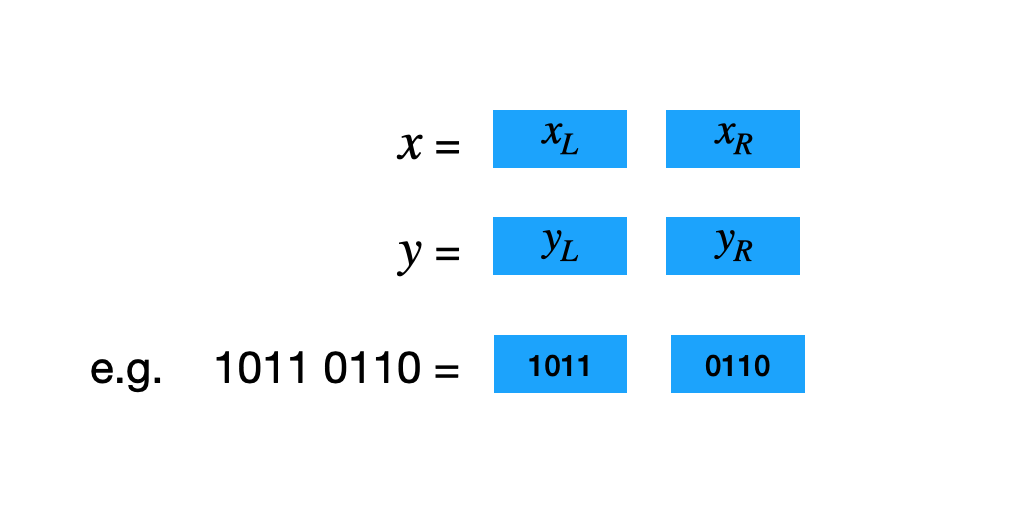

所以$x$和$y$就可以重新写成：
\begin{align}
x &= 2^{n/2} x_L + x_R \\
y &= 2^{n/2} y_L + y_R .
\end{align}

它们的乘积也可以用$x_L$、$x_R$、$y_L$和$y_R$表示：
$$
x \cdot y = 2^n x_L y_L + 2^{n/2} (x_L y_R + x_R y_L) + x_R y_R.
$$

这样写的好处是可以将$n$-bit整数的乘法转换成4组$n/2$-bit整数的乘法，逐个击破，最后将这四组结果合并。

下面我们来看看“分”和“治”分别花了多少时间。“分”的部分将每个数拆成左右各一半，这可以通过左移(left shift) $n/2$个bit达成，所以耗费$O(n)$的力气；“治”的部分也可以由左移操作完成，耗费$O(n)$的力气。所以，递归式为
$$
T(n) = 4 T(n/2) + O(n).
$$

等等，解这个递归式会得到$T(n)=O(n^2)$，这和1位1位相乘再相加好像没有区别吧？是的，如果分割成四个子问题的话就和最"naive"的乘法没有区别了，但是这四个子问题之间是有关系的，中间一项$x_Ly_R + x_Ry_L$可以写成

$$
x_Ly_R + x_Ry_L = (x_L + x_R) (y_L + y_R) - x_L y_L - x_R y_R.
$$

也就是说，我们只要算$x_Ry_R$、$x_Ly_L$和$(x_L + x_R) (y_L + y_R)$这三组乘法就足够了，这就是精妙之处！

优化后的递归式为
$$
T(n) = 3 T(n/2) + O(n),
$$
利用Master定理可以知道$T(n)=O(n^{\log_2 3})$，大约为$O(n^{1.59})$。

**代码**

In [60]:
# two 8-bit numbers
x = 0b10011011
y = 0b10111010

In [61]:
def multiply(x, y, n):
    """
    Multiply two n-bit positive integers.
    
    Args:
        x: int
        y: int
        n: int, assumed to be power of 2
    Returns:
        prod: int
    """
    if n == 1:
        return x * y
    
    x_l, x_r = divmod(x, 2 ** (n / 2))
    y_l, y_r = divmod(y, 2 ** (n / 2))
    
    p1 = multiply(x_l, y_l, n / 2)
    p2 = multiply(x_r, y_r, n / 2)
    p3 = multiply(x_l + x_r, y_l + y_r, n / 2)
    
    prod = p1 * 2 ** n + (p3 - p1 - p2) * 2 ** (n / 2) + p2
    return prod


In [63]:
multiply(x, y, 8)

28830.0

**可以更快吗？**

还有没有比这更快的整数乘法算法？答案是有的，需要用到书中之后介绍的快速傅立叶变换(FFT)，也是接下来要填坑的主题。